
CODE-ALONG PROJECT
SALES DATA ANALYSIS BY KEITH GALLI
Youtube Link: https://www.youtube.com/watch?v=eMOA1pPVUc4&t=7s
Github link: https://github.com/KeithGalli/Pandas-Data-Science-Tasks



In [12]:
# importing the necessary libraries
import pandas as pd
import datetime
import calendar



In [13]:
# Merging all separate files into 1


jan = pd.read_csv('Sales_January_2019.csv')
feb = pd.read_csv('Sales_February_2019.csv')
mar = pd.read_csv('Sales_March_2019.csv')
apr = pd.read_csv('Sales_April_2019.csv')
may = pd.read_csv('Sales_May_2019.csv')
jun = pd.read_csv('Sales_June_2019.csv')
jul = pd.read_csv('Sales_July_2019.csv')
aug = pd.read_csv('Sales_August_2019.csv')
sep = pd.read_csv('Sales_September_2019.csv')
oct = pd.read_csv('Sales_October_2019.csv')
nov = pd.read_csv('Sales_November_2019.csv')
dec = pd.read_csv('Sales_December_2019.csv')

df = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], ignore_index=True)
df.to_csv('Combined_Sales_Data_2019.csv',index=False)


In [14]:
# we now read the combined file alone to reduce load time

df = pd.read_csv('Combined_Sales_Data_2019.csv')
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


DATA CLEANING
REMOVING ALL NULL VALUES

In [15]:
#Removing all Null Values
df.dropna(axis=0, inplace=True)
#making sure there are no null values
df.isnull().sum() 

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
# Check the data types of each column
print(df.dtypes)
#shows all columns as objects

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [17]:
#Add a month column to the dataframs
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')
df = df.dropna(subset=['Order Date'])

df['Month'] = df['Order Date'].dt.month
df['Month'] = df['Month'].astype('int')
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])


C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\3306905738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.month
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\3306905738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\3306905738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

WHAT WAS THE BEST MONTH FOR SALES AND WHAT WAS SOLD THAT MONTH?
FIRST WE ADD A SALES COLUMN

In [18]:
# Add a Sales column
# 'Price Each' and 'Quantity Ordered' are strings. Therefore convert them to int to multiply them
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']


C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\2543232979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype('float')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\2543232979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\2543232979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

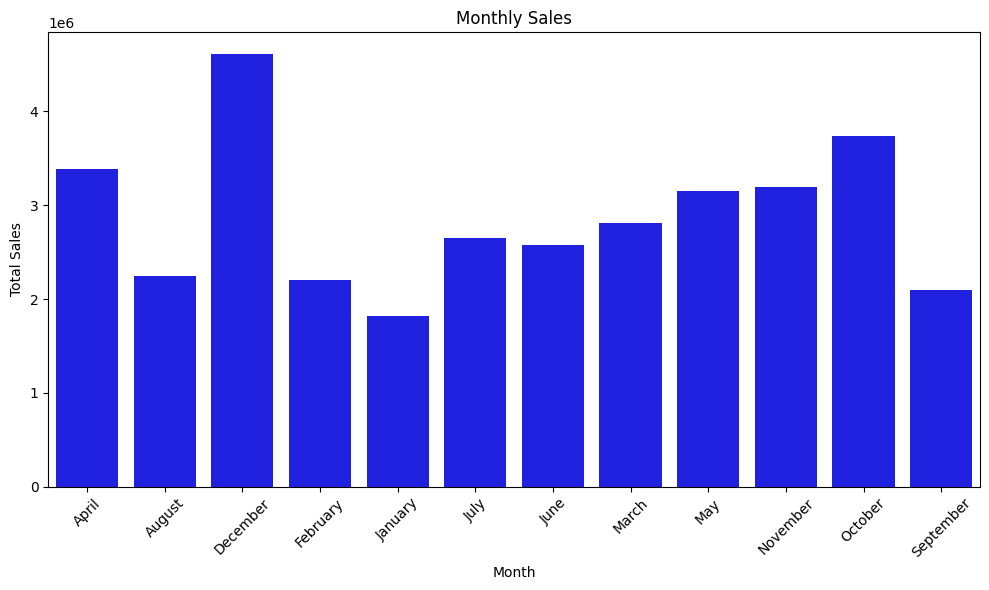

In [19]:
# WHAT WAS THE BEST MONTH FOR SALES?
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# #show the sales in each month
# # monthly_sales.idxmax
# months  = df['Month']
# plt.bar(monthly_sales.index, monthly_sales.values, color='blue')
# plt.xlabel('Months')
# plt.ylabel('Sales in Millions')
# plt.title('Graphy showing sales in 2019')

WHAT CITY HAD THE HIGHEST NUMBER OF SALES

C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\1424416029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].str.split(', ').str[1]
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\1424416029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].str.strip()


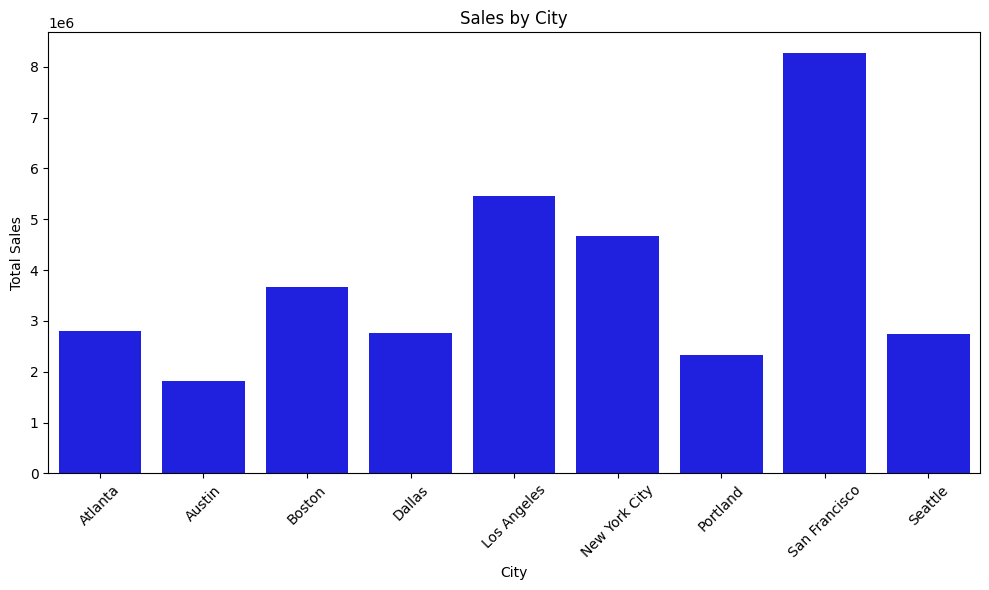

In [20]:
# Splitting the 'Physical Address' column to extract the city information
df['City'] = df['Purchase Address'].str.split(', ').str[1]
# After splitting the string and extracting the city, we can strip it to use groupby
df['City'] = df['City'].str.strip()
#use groupby to tell sales by city
city_sales = df.groupby('City')['Sales'].sum()
# PLot that data on a chart

plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, color='blue')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Sales by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**WHAT TIME SHOULD WE ADVERTISE THE PRODUCT TO MAXIMIZE THE LIKELIHOOD OF THE CUSTOMER BUYING THE PRODUCT?**

C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\1838429672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\1838429672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\1838429672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

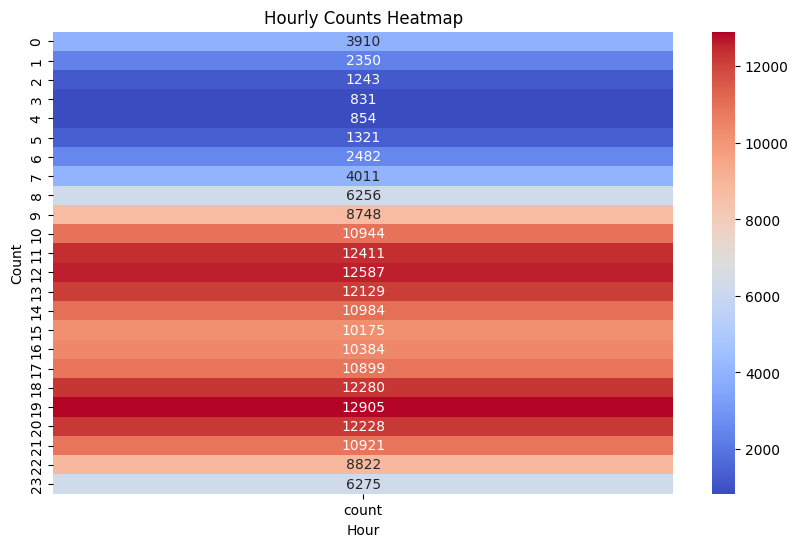

In [21]:
#extract hours from the data

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

# Count the number of rows each appears

hour_count = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.heatmap(hour_count.to_frame(), annot=True, fmt='d', cmap='coolwarm')
plt.title('Hourly Counts Heatmap')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()




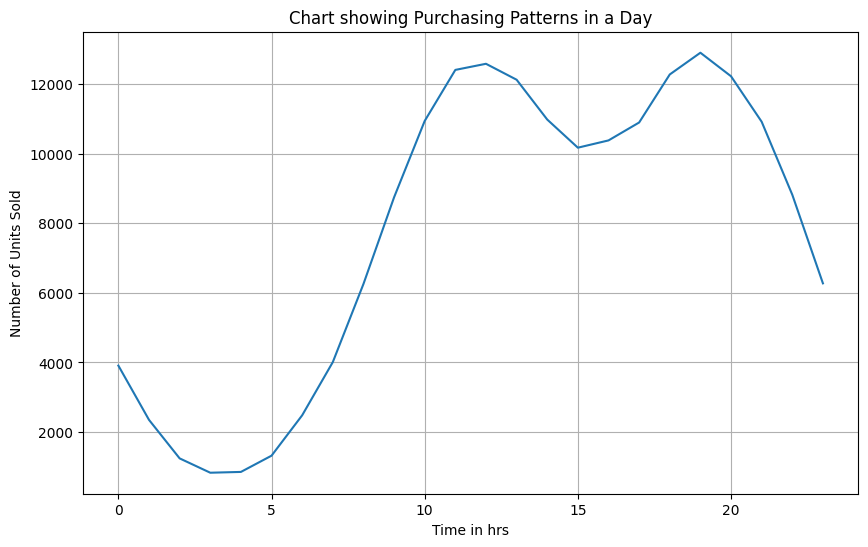

In [37]:
hour_count = df['Hour'].value_counts().sort_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(hour_count)
plt.title('Chart showing Purchasing Patterns in a Day')
plt.xlabel('Time in hrs')
plt.ylabel('Number of Units Sold')
plt.grid()
plt.show()

WHAT PRODUCTS ARE THE MOST OFTEN SOLD TOGETHER?

In [23]:
# CREATE A NEW DATAFRAME WITH ROWS THAT HAVE SAME ORDER ID
new_df = df[df['Order ID'].duplicated(keep=False)]
new_df['Grouped'] = new_df.groupby(df['Order ID'])['Product'].transform(lambda x: ', ' .join(x))
new_df= new_df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\HomePC\AppData\Local\Temp\ipykernel_2068\3992378395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby(df['Order ID'])['Product'].transform(lambda x: ', ' .join(x))


In [24]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))


for key, value in count.most_common(10):
    print(key, value)


('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


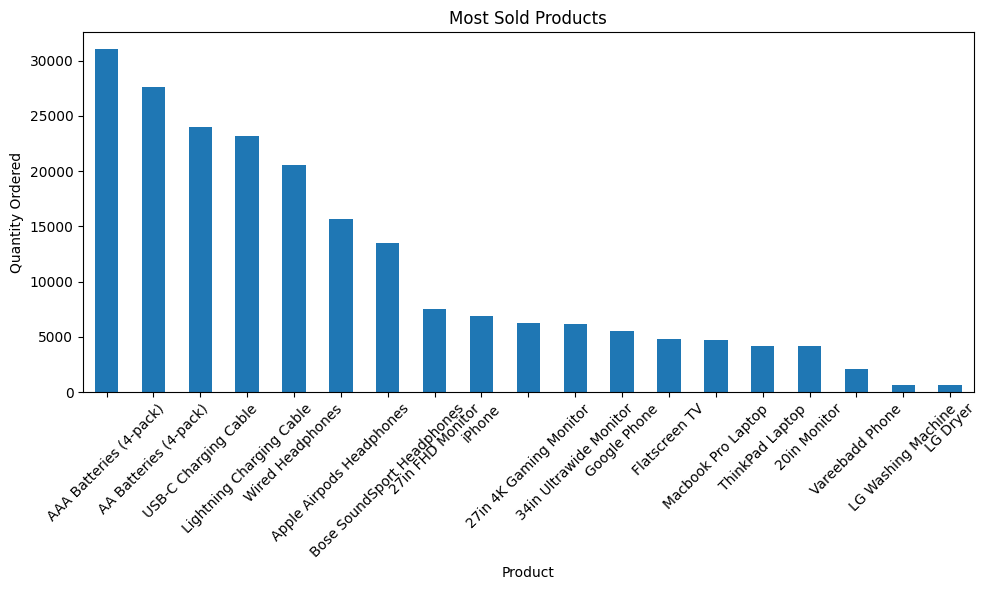

In [25]:
# What product sold the most and why did it sell the most?
# Sum of quantity ordered based on groupby the product

most_sold = df.groupby(df['Product'])['Quantity Ordered'].sum()
#Check whether the items have been printed
# print(most_sold.sort_values(ascending=False))

# Plot this on a graph
plt.figure(figsize=(10, 6))
most_sold.sort_values(ascending=False).plot(kind='bar')
plt.title('Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


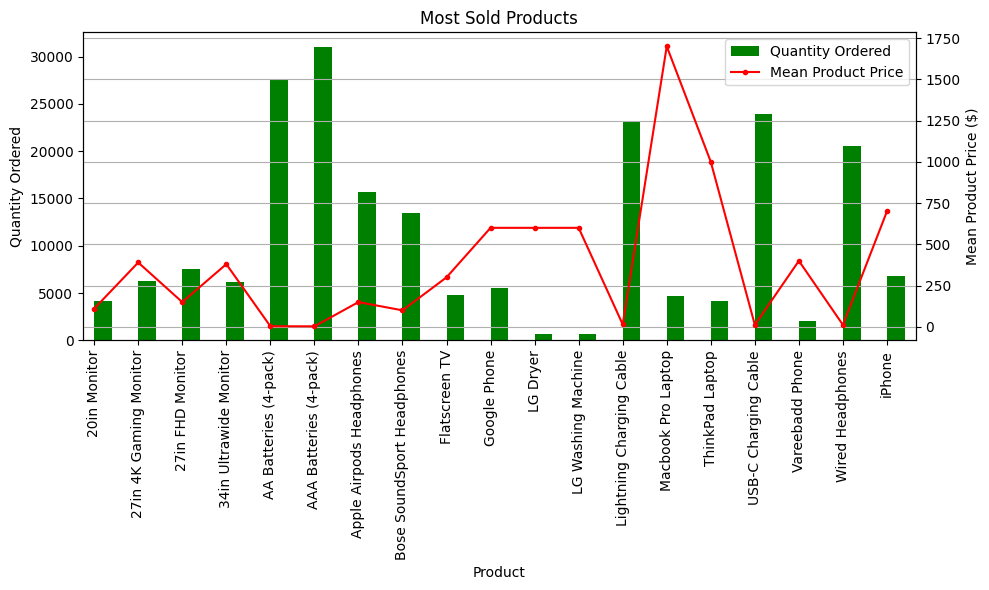

In [35]:

prices = df.groupby('Product')['Price Each'].mean()



# Create a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar graph for most sold products
most_sold.plot(kind='bar', ax=ax1, color='green', position=0, width=0.4, label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax1.set_title('Most Sold Products')

# # Create a twin Axes sharing the xaxis for the mean product price data
ax2 = ax1.twinx()
prices.plot(kind='line', marker='.', color='red', ax=ax2, label='Mean Product Price')
ax2.set_ylabel('Mean Product Price ($)')
ax2.grid(None)

# # Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# # Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.gca().set_xticklabels(most_sold.index)
plt.tight_layout()
plt.show()